<a href="https://www.kaggle.com/code/aradhanasaha/taylor-s-rule?scriptVersionId=145569374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-macros/GDPCA.csv
/kaggle/input/us-macros/RIFSPFFNA.csv
/kaggle/input/us-macros/FPCPITOTLZGUSA.csv


The Taylor rule is a monetary policy targeting rule. The rule was proposed in 1992 by American economist John B. Taylor for central banks to use to stabilize economic activity by appropriately setting short-term interest rates. The rule considers the federal funds rate, the price level and changes in real income.

In this project, I try to compare the actual prevailing federal funds rate in USA from the '60s to 2020's to the Taylor prescribed rate. For this purpose, I have downloaded data from FRED on real GDP, inflation (Consumer Price Index), and Federal Funds Effective Rate. 

In [2]:
df1=pd.read_csv('/kaggle/input/us-macros/RIFSPFFNA.csv')
df1.rename(columns={'RIFSPFFNA': 'Federal Funds Effective Rate'}, inplace=True)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          68 non-null     object 
 1   Federal Funds Effective Rate  68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [4]:
df1.set_index(pd.to_datetime(df1['DATE']), inplace=True)
df1.drop(columns='DATE',inplace=True)

In [5]:
fedrate=df1[6:]
fedrate

,Federal Funds Effective Rate
DATE,
1961-01-01,1.95
1962-01-01,2.71
1963-01-01,3.18
1964-01-01,3.50
1965-01-01,4.08
...,...
2018-01-01,1.83
2019-01-01,2.16
2020-01-01,0.37


In [6]:
df2=pd.read_csv('/kaggle/input/us-macros/FPCPITOTLZGUSA.csv')
df2.set_index(pd.to_datetime(df2['DATE']), inplace=True)
df2.drop(columns='DATE',inplace=True)
df2.rename(columns={'FPCPITOTLZGUSA': 'CPI'}, inplace=True)
inflation=df2[1:]
inflation

,CPI
DATE,
1961-01-01,1.070724
1962-01-01,1.198773
1963-01-01,1.239669
1964-01-01,1.278912
1965-01-01,1.585169
...,...
2018-01-01,2.442583
2019-01-01,1.812210
2020-01-01,1.233584


In [7]:
df=pd.read_csv('/kaggle/input/us-macros/GDPCA.csv')
df.set_index(pd.to_datetime(df['DATE']), inplace=True)
df.drop(columns='DATE',inplace=True)
df.rename(columns={'GDPCA': 'GDP'}, inplace=True)
df

,GDP
DATE,
1929-01-01,1110.206
1930-01-01,1015.751
1931-01-01,950.686
1932-01-01,828.061
1933-01-01,817.824
...,...
2018-01-01,18609.078
2019-01-01,19036.052
2020-01-01,18509.143


In [8]:
gdp=df[31:]

In [9]:
gdp.head()

,GDP
DATE,
1960-01-01,3262.061
1961-01-01,3345.690
1962-01-01,3550.684
1963-01-01,3705.318
1964-01-01,3918.791


For this purpose, I am converting the gdp values in its log difference format.

In [10]:
gdp['log_diff'] = gdp['GDP'].apply(lambda x: x if x == 0 else x)  # Handle potential zeros
gdp['log_diff'] = gdp['GDP'].apply(lambda x: None if x == 0 else x).pct_change()

/tmp/ipykernel_20/1513042657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['log_diff'] = gdp['GDP'].apply(lambda x: x if x == 0 else x)  # Handle potential zeros
/tmp/ipykernel_20/1513042657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['log_diff'] = gdp['GDP'].apply(lambda x: None if x == 0 else x).pct_change()


In [11]:
gdp.dropna(inplace=True)

/tmp/ipykernel_20/3166753067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp.dropna(inplace=True)


In [12]:
gdp.head()

,GDP,log_diff
DATE,,
1961-01-01,3345.690,0.025637
1962-01-01,3550.684,0.061271
1963-01-01,3705.318,0.043550
1964-01-01,3918.791,0.057613
1965-01-01,4173.424,0.064977


Using the HP filter, to get the output gap which is nothing but the cyclical deviations in the GDP time series.

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle, trend = hpfilter(gdp['log_diff'], lamb=6.25)
gdp_segr = pd.DataFrame(gdp['log_diff'], index=gdp.index)
gdp_segr['cycle']= cycle
gdp_segr['trend'] =trend
gdp_segr

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,log_diff,cycle,trend
DATE,,,
1961-01-01,0.025637,-0.013463,0.039100
1962-01-01,0.061271,0.014768,0.046503
1963-01-01,0.043550,-0.008201,0.051752
1964-01-01,0.057613,0.002557,0.055055
1965-01-01,0.064977,0.009667,0.055311
...,...,...,...
2018-01-01,0.029454,0.009682,0.019771
2019-01-01,0.022944,0.004522,0.018423
2020-01-01,-0.027680,-0.046326,0.018646


Plotting the actual values, trend and cycle of GDP

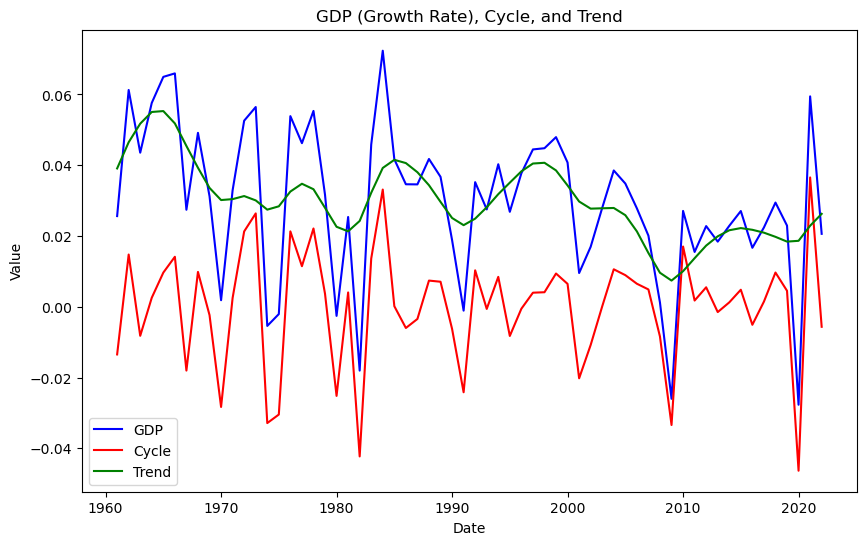

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the 'GDP' column in blue
plt.plot(gdp_segr.index, gdp_segr['log_diff'], color='blue', label='GDP')

# Plot the 'cycle' column in red
plt.plot(gdp_segr.index, gdp_segr['cycle'], color='red', label='Cycle')

# Plot the 'trend' column in green
plt.plot(gdp_segr.index, gdp_segr['trend'], color='green', label='Trend')

plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.title('GDP (Growth Rate), Cycle, and Trend')  # Set the title of the plot
plt.legend()  # Show the legend

plt.show()  # Display the plot

In [15]:
output_gap=gdp_segr['cycle'].to_frame()

In [16]:
output_gap

,cycle
DATE,
1961-01-01,-0.013463
1962-01-01,0.014768
1963-01-01,-0.008201
1964-01-01,0.002557
1965-01-01,0.009667
...,...
2018-01-01,0.009682
2019-01-01,0.004522
2020-01-01,-0.046326


Checking for null values

In [17]:
fedrate.isnull().sum()

Federal Funds Effective Rate    0
dtype: int64

In [18]:
inflation.isnull().sum()

CPI    0
dtype: int64

In [19]:
output_gap.isnull().sum()

cycle    0
dtype: int64

In [20]:
frames=[fedrate,inflation,output_gap]
df=pd.concat(frames, axis=1)
df

,Federal Funds Effective Rate,CPI,cycle
DATE,,,
1961-01-01,1.95,1.070724,-0.013463
1962-01-01,2.71,1.198773,0.014768
1963-01-01,3.18,1.239669,-0.008201
1964-01-01,3.50,1.278912,0.002557
1965-01-01,4.08,1.585169,0.009667
...,...,...,...
2018-01-01,1.83,2.442583,0.009682
2019-01-01,2.16,1.812210,0.004522
2020-01-01,0.37,1.233584,-0.046326


Creating a column that holds the Taylor's Rule rates

In [21]:
df['taylor'] = df['CPI'] + 2 + 0.5 * (df['CPI'] - 2) - (0.5 * df['cycle'])
df.head()

,Federal Funds Effective Rate,CPI,cycle,taylor
DATE,,,,
1961-01-01,1.95,1.070724,-0.013463,2.612818
1962-01-01,2.71,1.198773,0.014768,2.790776
1963-01-01,3.18,1.239669,-0.008201,2.863605
1964-01-01,3.50,1.278912,0.002557,2.917089
1965-01-01,4.08,1.585169,0.009667,3.372921


Finally, plotting the actual v/s the Taylor rates. We do get to see some coincidence in some time periods but more or less the actual rate has varied by a considerable amount than the Taylor's prescription.

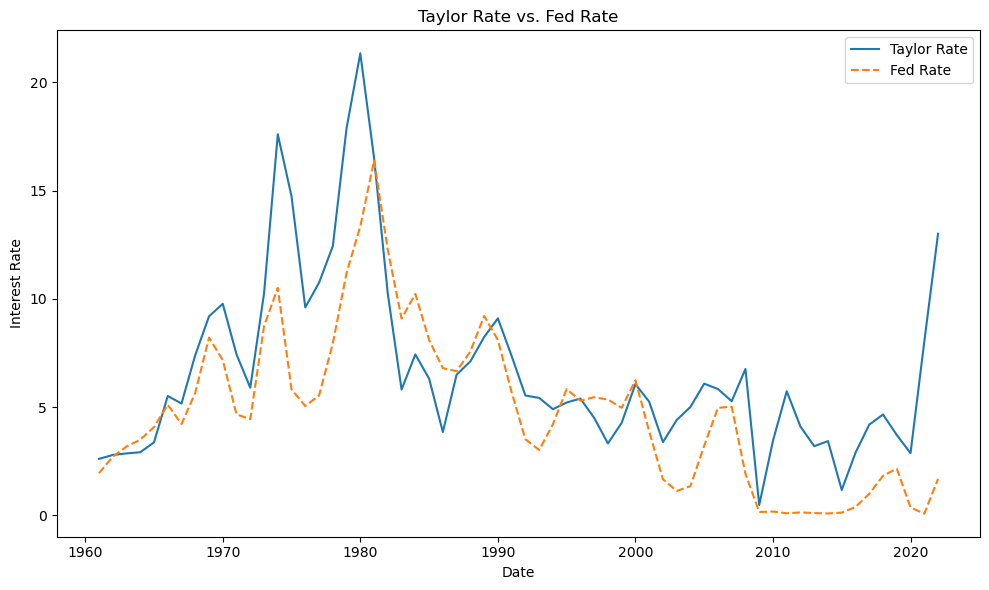

In [22]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot Taylor rate and Fed rate columns
plt.plot(df.index, df['taylor'], label='Taylor Rate')
plt.plot(df.index, df['Federal Funds Effective Rate'], label='Fed Rate', linestyle='dashed')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Taylor Rate vs. Fed Rate')
plt.legend()  # Display legend

plt.savefig('Taylor vs Actual.png',dpi=300)

# Show the plot
plt.tight_layout()
plt.show()